In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import statsmodels.api as sm
import matplotlib
from pylab import rcParams

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
daily_sales = pd.read_excel('./time_series_sandoz/Exercise - Daily Sales - FOR CANDIDATE-SENT - SHORT.xlsx', sheet_name = 1, 
                            parse_dates=['Posting Date'])

Necesita generar una primera previsión para las ventas de todo el mes de noviembre de 2017 el 15 de noviembre (el 15 de noviembre es un día laborable). Para esta previsión a partir del 15 de noviembre, no puede utilizar el valor de las ventas diarias del 16 de noviembre o posteriores, ya que obviamente no habrían estado disponibles a partir del 15 de noviembre (

In [3]:
daily_sales.tail()

,Country,Posting Date,Brand,Daily Sales
629,Country 1,2018-02-14,Brand A,11305.37152
630,Country 1,2018-02-19,Brand A,25179.30168
631,Country 1,2018-02-20,Brand A,13206.75222
632,Country 1,2018-02-21,Brand A,10384.84878
633,Country 1,2018-02-23,Brand A,20.41332


In [4]:
daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Country       634 non-null    object        
 1   Posting Date  634 non-null    datetime64[ns]
 2   Brand         634 non-null    object        
 3   Daily Sales   634 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 19.9+ KB


In [5]:
cols=['Country', 'Brand']
daily_sales = daily_sales.drop(cols, axis = 1)
daily_sales = daily_sales.set_index('Posting Date')

In [6]:
daily_sales.head()

,Daily Sales
Posting Date,
2015-02-01,30785.21560
2015-05-01,18256.02366
2015-06-01,24168.04468
2015-07-01,3858.64932
2015-12-01,1229.33310


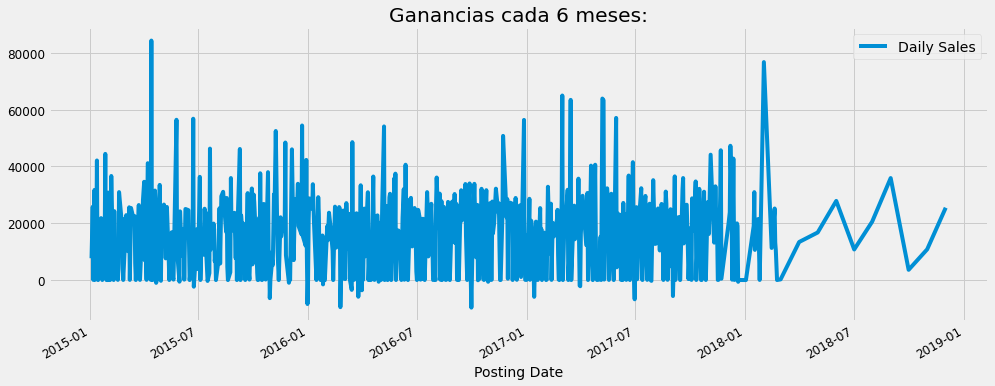

In [8]:
gan = daily_sales.plot(figsize=(15, 6), title='Ganancias cada 6 meses:')

In [16]:
daily_sales_perD = daily_sales.resample("D").sum()
#daily_sales_days.fillna(daily_sales_days["Daily Sales"].min(),inplace=True)
daily_sales_perD.head()

,Daily Sales
Posting Date,
2015-01-04,7676.84934
2015-01-05,0.00000
2015-01-06,25785.81652
2015-01-07,67.01334
2015-01-08,0.00000


In [17]:
#Make the first dataframe of November from 01 to 15:
daily_sales_nov=daily_sales_perD.loc['2017-11-01':'2017-11-15']
daily_sales_nov

,Daily Sales
Posting Date,
2017-11-01,16209.75284
2017-11-02,0.00000
2017-11-03,0.00000
2017-11-04,44108.84254
2017-11-05,0.00000
2017-11-06,0.00000
2017-11-07,0.00000
2017-11-08,0.00000
2017-11-09,16929.62534


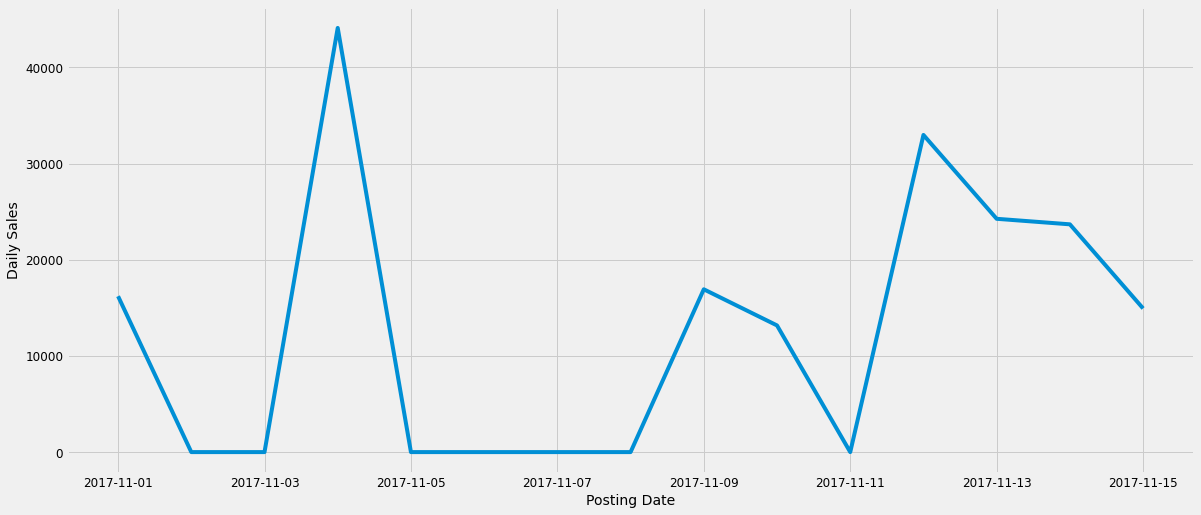

In [24]:
rcParams['figure.figsize'] = 18, 8
plt.xlabel("Posting Date")
plt.ylabel("Daily Sales")
plt.plot(daily_sales_nov)

Vemos que hay una tendencia que no es lineal, tiene sus picos a veces aumenta y luego desciende. No es estacionaria porque la media no es constante. A priori no hay una covarianza, osea las variables no están relacionadas.

In [21]:
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(daily_sales_nov['Daily Sales'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

-3.6337942980265376
0.005146866225594975
{'1%': -4.01203360058309, '5%': -3.1041838775510207, '10%': -2.6909873469387753}


In [27]:
# Instantiate the model
model = ARMA(daily_sales_nov['Daily Sales'], order=(3, 1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

NameError: name 'ARMA' is not defined